In [1]:
# import
import graphlab as gl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gl.canvas.set_target('ipynb')
%matplotlib inline

In [3]:
# reading data
sales = gl.SFrame('data/kc_house_data.gl/')
sales = sales.sort(['sqft_living','price'])
sales.head(2)

This non-commercial license of GraphLab Create for academic use is assigned to atul9806@yahoo.in and will expire on February 02, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Atul\AppData\Local\Temp\graphlab_server_1503211782.log.0


Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 2

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 3980300371 | 2014-09-26 00:00:00+00:00 | 142000.0 |   0.0    |    0.0    |
| 2856101479 | 2014-07-01 00:00:00+00:00 | 276000.0 |   1.0    |    0.75   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    290.0    |  20875   |   1    |     0      |  0   |     1     |   1   |    290     |
|    370.0    |   1801   |   1    |     0      |  0   |     5     |   5   |    370     |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|       0       |   1963   |      0       |  98024  | 47.53077245 |
|       0       |   1923   |      0       |  98117  | 47.67782145 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -121.88842327 |     1620.0    | ... |
| -122.38911208 |     1340.0    | ... |
+---------------+---------------+-----+
[2 rows x 21 columns]

In [4]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = gl.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            #poly_sframe[name]= feature.apply(lambda x: x**power)
            poly_sframe[name]= feature**power   # can use this as well
    return poly_sframe

In [5]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
col_names = poly1_data.column_names()
poly1_data['price'] = sales['price']
poly1_data_names = poly1_data.column_names()

In [6]:
model1 = gl.linear_regression.create(poly1_data, target = 'price', features = col_names, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.010816     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

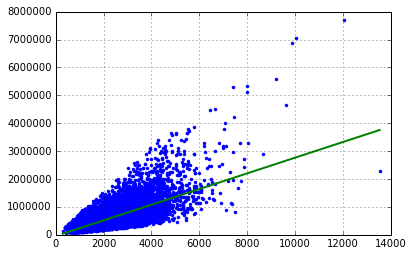

In [7]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.',
        poly1_data['power_1'], model1.predict(poly1_data), '-', linewidth=2)
plt.grid(True)

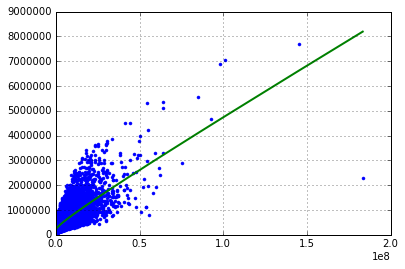

In [8]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data_names = poly2_data.column_names()
poly2_data['price'] = sales['price']


model2 = gl.linear_regression.create(poly2_data, target = 'price', features = poly2_data_names, 
                                     validation_set = None, verbose=False)

plt.plot(poly2_data['power_2'], poly2_data['price'], '.',
        poly2_data['power_2'], model2.predict(poly2_data), '-', linewidth=2)
plt.grid(True)

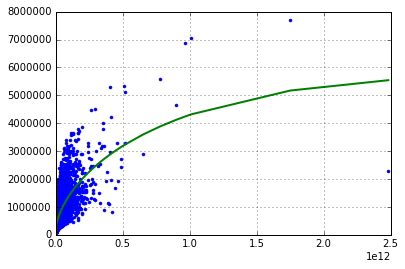

In [9]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_data_names = poly3_data.column_names()
poly3_data['price'] = sales['price']

model3 = gl.linear_regression.create(poly3_data, target = 'price', features = poly3_data_names, validation_set = None, verbose=False)

plt.plot(poly3_data['power_3'], poly3_data['price'], '.',
        poly3_data['power_3'], model3.predict(poly3_data), '-', linewidth=2)
plt.grid(True)

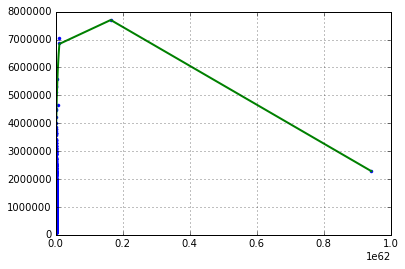

In [10]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data_names = poly15_data.column_names()
poly15_data['price'] = sales['price']

model15 = gl.linear_regression.create(poly15_data, target = 'price', features = poly15_data_names, validation_set = None, verbose=False)

plt.plot(poly15_data['power_15'], poly15_data['price'], '.',
        poly15_data['power_15'], model15.predict(poly15_data), '-', linewidth=2)
plt.grid(True)

```
first split sales into 2 subsets with .random_split(.5) use seed = 0!
next split these into 2 more subsets (4 total) using random_split(0.5) again set seed = 0!
you should have 4 subsets of (approximately) equal size, call them set_1, set_2, set_3, and set_4
```

In [11]:
sales1, sales2 = sales.random_split(.5, seed = 0)
set_1, set_2 =   sales1.random_split(0.5, seed = 0)
set_3, set_4 =   sales2.random_split(0.5, seed = 0)

+----------+-------+-------------------+--------+
|   name   | index |       value       | stderr |
+----------+-------+-------------------+--------+
| power_15 |  None | 5.01975232977e-55 |  nan   |
+----------+-------+-------------------+--------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


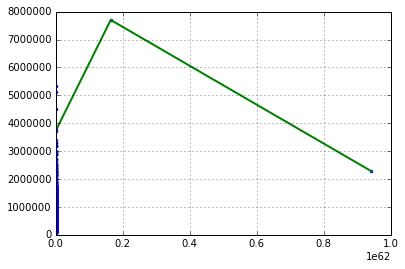

In [12]:
poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
poly15_set_1_names = poly15_set_1.column_names()
poly15_set_1['price'] = set_1['price']

#print(poly15_set_1.head(2))

model15_set_1 = gl.linear_regression.create(poly15_set_1, target = 'price', 
                                            features = poly15_set_1_names, validation_set = None,
                                            verbose=False)

plt.plot(poly15_set_1['power_15'], poly15_set_1['price'], '.',
         poly15_set_1['power_15'], model15_set_1.predict(poly15_set_1), '-', linewidth=2)
plt.grid(True)

coeff=model15_set_1.get('coefficients')
print(coeff[coeff['name']=='power_15'])

+----------+-------+-------------------+-------------------+
|   name   | index |       value       |       stderr      |
+----------+-------+-------------------+-------------------+
| power_15 |  None | 1.68636658343e-52 | 5.48952449718e-48 |
+----------+-------+-------------------+-------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


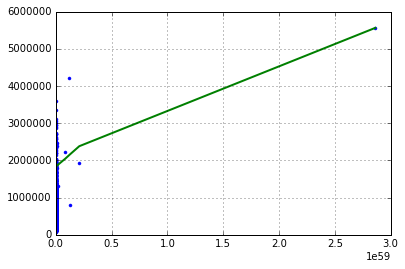

In [13]:
poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
poly15_set_2_names = poly15_set_2.column_names()
poly15_set_2['price'] = set_2['price']

model15_set_2 = gl.linear_regression.create(poly15_set_2, target = 'price', features = poly15_set_2_names, 
                                            validation_set = None, verbose=False)

plt.plot(poly15_set_2['power_15'], poly15_set_2['price'], '.',
        poly15_set_2['power_15'], model15_set_2.predict(poly15_set_2), '-', linewidth=2)
plt.grid(True)

coeff=model15_set_2.get('coefficients')
print(coeff[coeff['name']=='power_15'])

+----------+-------+-------------------+--------+
|   name   | index |       value       | stderr |
+----------+-------+-------------------+--------+
| power_15 |  None | 6.39045885969e-53 |  nan   |
+----------+-------+-------------------+--------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


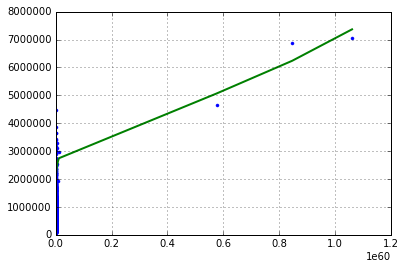

In [14]:
poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
poly15_set_3_names = poly15_set_3.column_names()
poly15_set_3['price'] = set_3['price']

model15_set_3 = gl.linear_regression.create(poly15_set_3, target = 'price', features = poly15_set_3_names, 
                                            validation_set = None, verbose=False)

plt.plot(poly15_set_3['power_15'], poly15_set_3['price'], '.',
        poly15_set_3['power_15'], model15_set_3.predict(poly15_set_3), '-', linewidth=2)
plt.grid(True)

coeff=model15_set_3.get('coefficients')
print(coeff[coeff['name']=='power_15'])

+----------+-------+-------------------+-------------------+
|   name   | index |       value       |       stderr      |
+----------+-------+-------------------+-------------------+
| power_15 |  None | -4.7453533305e-51 | 1.59266761432e-47 |
+----------+-------+-------------------+-------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


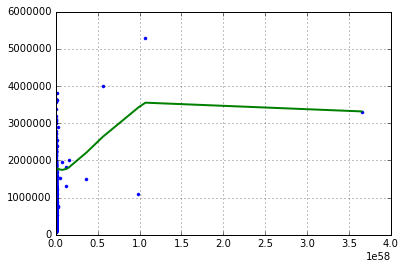

In [15]:
poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15)
poly15_set_4_names = poly15_set_4.column_names()
poly15_set_4['price'] = set_4['price']

model15_set_4 = gl.linear_regression.create(poly15_set_4, target = 'price', features = poly15_set_4_names, 
                                            validation_set = None, verbose=False)

plt.plot(poly15_set_4['power_15'], poly15_set_4['price'], '.',
        poly15_set_4['power_15'], model15_set_4.predict(poly15_set_4), '-', linewidth=2)
plt.grid(True)

coeff=model15_set_4.get('coefficients')
print(coeff[coeff['name']=='power_15'])

In [16]:
training_and_validation, testing =  sales.random_split(0.9, seed=1)
training, validation =  training_and_validation.random_split(0.5, seed=1)

In [17]:
RSS_validation = {}
RSS_testing = {}
for degree in range(1, 16):
    model_name = 'model_'+ str(degree)
    dataset_name = 'dataset_'+ str(degree)
    feature_name =  'power_'+ str(degree)
    
    validation_dataset = gl.SFrame()
    validation_dataset = polynomial_sframe(validation['sqft_living'], degree)
    #validation_columns = validation_dataset.column_names()
    validation_dataset['price'] = validation['price']
    
    testing_dataset = gl.SFrame()
    #testing_dataset[feature_name] = testing['sqft_living']
    testing_dataset = polynomial_sframe(testing['sqft_living'], degree)
    #testing_columns = testing_dataset.column_names()
    testing_dataset['price'] = testing['price']
    
    dataset_name = polynomial_sframe(training['sqft_living'], degree)
    training_columns = dataset_name.column_names()
    dataset_name['price'] = training['price']
    
    model_name = gl.linear_regression.create(dataset_name, 
                                             target = 'price', 
                                             features = training_columns, 
                                             validation_set = None, 
                                             verbose = False)
    validation_dataset['prediction'] = model_name.predict(validation_dataset)
    #print(validation_dataset['prediction'])
    rss = np.sum(np.square(validation_dataset['price'] - validation_dataset['prediction']))
    rss2 = np.sum(np.square(testing_dataset['price'] - model_name.predict(testing_dataset)))

    RSS_validation[degree] = rss
    RSS_testing[degree] = rss2

In [18]:
# sorting the dict
for k in sorted(RSS_validation, key=RSS_validation.get):
    print k,'\t',RSS_validation[k]

6 	5.89182477809e+14
7 	5.91717038418e+14
5 	5.99177138584e+14
8 	6.01558237777e+14
2 	6.07090530698e+14
4 	6.09129230654e+14
9 	6.12563853988e+14
15 	6.13089202413e+14
3 	6.16714574533e+14
14 	6.19369705907e+14
10 	6.21744288936e+14
13 	6.24738503262e+14
11 	6.27012012704e+14
12 	6.2775791477e+14
1 	6.76709775198e+14


In [19]:
for k in sorted(RSS_testing, key=RSS_testing.get):
    print k,'\t',RSS_testing[k]


8 	1.24458964534e+14
9 	1.24525299776e+14
15 	1.24593903713e+14
10 	1.24602928485e+14
7 	1.2460877361e+14
14 	1.24612578389e+14
13 	1.24632209805e+14
11 	1.24641733744e+14
12 	1.24646108317e+14
2 	1.25190117213e+14
6 	1.25529337848e+14
3 	1.25939457007e+14
5 	1.2703773021e+14
4 	1.27147719016e+14
1 	1.29030470095e+14
